###**KFold Cross Validation Python Tutorial**

Cross-validation is a statistical method used to estimate the skill of machine learning models.

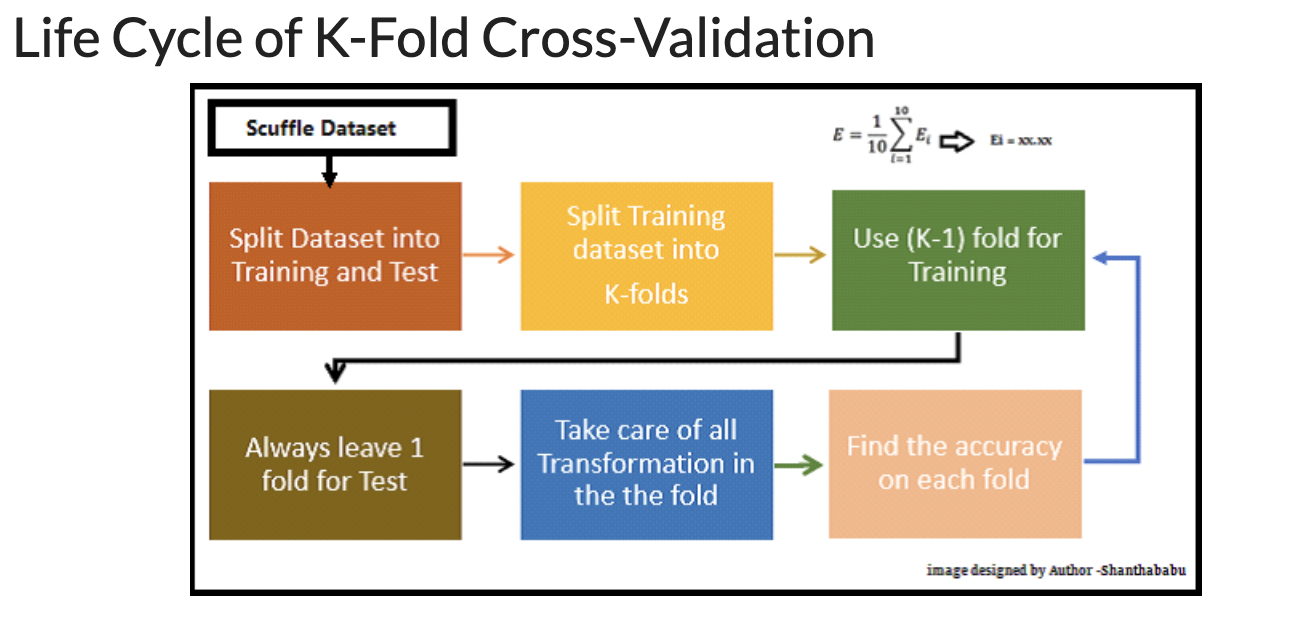

**K-fold cross-validation is one of the most popular strategies widely used by data scientists. It is a data partitioning strategy so that you can effectively use your dataset to build a more generalized model.**

---
## **Exercise**
Use iris flower dataset from sklearn library and use **cross_val_score** against following models to measure the performance of each. In the end figure out the model with best performance,

Logistic Regression <br>
SVM <br>
Decision Tree <br>
Random Forest

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

In [198]:
from sklearn.datasets import load_iris
iris = load_iris()

In [199]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [200]:
df = pd.DataFrame(iris.data)

In [201]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [202]:
df['Target']=iris.target

In [203]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

**Logistic** **Regression**

In [204]:
lr = LogisticRegression(max_iter=150)
lr.fit(x_train, y_train)
lr.score(x_test, y_test)


0.9111111111111111

 **SVM**

In [205]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9333333333333333

**Decision tree**

In [206]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9111111111111111

**Random Forest**

In [207]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.9111111111111111

## **KFold cross validation**

In [208]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [216]:
for train_index, test_index in kf.split(df):
    print(train_index, test_index)

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] [50 51 52 53 54 55 56 57 58 59 6

In [217]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

**Using Stratified KFold** <br>
Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation does uniform sampling instead of random sampling.

In [218]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

### **cross_val_score function**

The cross_val_score() function is used to perform the evaluation, taking the dataset and cross-validation configuration, and returning a list of average accuracy scores calculated for each fold.

In [229]:
from sklearn.model_selection import cross_val_score

In [258]:
print("Logistic regression")
scores = cross_val_score(LogisticRegression(max_iter=150), iris.data, iris.target,cv=3)
print(scores)
np.average(scores)

Logistic regression
[0.98 0.96 0.98]


0.9733333333333333

In [259]:
print("SVC")
scores=cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=3)
print(scores)
np.average(scores)

SVC
[0.98 0.98 0.96]


0.9733333333333333

In [255]:
print("RandomForestClassifier")
scores = cross_val_score(RandomForestClassifier(n_estimators=40),iris.data, iris.target,cv=3)
print(scores)
np.average(scores)


RandomForestClassifier
[0.98 0.94 0.92]


0.9466666666666667

In [252]:
print("DecisionTreeClassifier")
scores = cross_val_score(tree.DecisionTreeClassifier(),iris.data, iris.target,cv=3)
print(scores)
np.average(scores)

DecisionTreeClassifier
[0.98 0.94 0.98]


0.9666666666666667

**SVC gave the highest score.**